In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Data_set.csv')

In [3]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [ ]:
data2 = data.drop(['infill_pattern'], axis=1)
data2 = data2.drop(['material'], axis=1)

# Hypothesis Testing

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def hypothesis_test(df, num_samples=5, sample_size=20, alpha=0.05):
    mu = []
    sigma = []
    x_bar = []
    s = []
    z_value = []
    p_value = []

    for col in df.columns:
        non_zero_values = df[col][df[col] != 0]
        sample_means = []
        for i in range(num_samples):
            sample = np.random.choice(non_zero_values, size=sample_size, replace=False)
            sample_means.append(sample.mean())
        avg_x_bar = np.mean(sample_means)
        avg_s = np.std(sample_means, ddof=1)
        mu.append(non_zero_values.mean())
        sigma.append(non_zero_values.std(ddof=1))
        x_bar.append(avg_x_bar)
        s.append(avg_s)
        z = (avg_x_bar - non_zero_values.mean()) / (non_zero_values.std(ddof=1) / np.sqrt(sample_size))
        z_value.append(z)
        p = 2 * (1 - norm.cdf(abs(z)))
        p_value.append(p)

    result_df = pd.DataFrame({'Population Mean': mu, 'Population Std Dev': sigma, 'Sample Mean': x_bar, 'Sample Std Dev': s, 'Z-score': z_value, 'P-value': p_value}, index=df.columns)
    result_df['Reject Null Hypothesis'] = result_df['P-value'] < alpha
    return result_df


In [ ]:
hypothesis_test(data2)

,Population Mean,Population Std Dev,Sample Mean,Sample Std Dev,Z-score,P-value,Reject Null Hypothesis
layer_height,0.106,0.064397,0.1037,0.014242,-0.159727,0.873096,False
wall_thickness,5.220,2.922747,4.9500,0.611351,-0.413131,0.679511,False
infill_density,53.400,25.363480,52.5000,2.121320,-0.158690,0.873913,False
nozzle_temperature,221.500,14.820353,223.4000,3.018692,0.573337,0.566416,False
bed_temperature,70.000,7.142857,69.5000,0.883883,-0.313050,0.754243,False
print_speed,64.000,29.692300,63.4000,6.024948,-0.090370,0.927994,False
fan_speed,62.500,28.306926,64.0000,3.468609,0.236981,0.812672,False
roughness,170.580,99.034129,178.4000,17.855461,0.353132,0.723990,False
tension_strenght,20.080,8.925634,20.0100,1.318332,-0.035073,0.972021,False
elongation,1.672,0.788188,1.5750,0.130432,-0.550373,0.582064,False


In hypothesis testing, you can never "accept" the null hypothesis, you can only fail to reject it. This is because we can never prove that the null hypothesis is true, we can only gather evidence that suggests it is not false.

When conducting a hypothesis test, we start by assuming that the null hypothesis is true, and then we use statistical methods to determine how likely it is that we would observe the data we have, or more extreme data, if the null hypothesis were true. We use this probability, known as the p-value, to make a decision about whether or not to reject the null hypothesis.

If the p-value is less than or equal to our chosen significance level (usually denoted by alpha), we reject the null hypothesis and conclude that there is evidence to suggest that the alternative hypothesis is true. If the p-value is greater than alpha, we fail to reject the null hypothesis and conclude that we do not have sufficient evidence to suggest that the alternative hypothesis is true.

In our case we have taken alpha = 0.05 and have taken 5 samples with 20 datapoints in each sample.

The Null Hypothesis we are assuming is H0: Sample mean = Population Mean
The Alternate Hypothesis we are assuming is Ha: Sample mean != Population Mean

From our Hypothesis testing we found that the P-value for all the features are less than that of the significance value that is alpha. Therefore, we fail to reject the Null Hypothesis. Which means Sample mean = Population Mean.

# Linear Regression

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Loading the Label Encoder function
infill_pattern = LabelEncoder().fit_transform(data.infill_pattern)
material = LabelEncoder().fit_transform(data.material)

In [ ]:
#We are appending the Labels to the dataframe
data2['infill_pattern'] = infill_pattern
data2['material'] = material
data2.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation,infill_pattern,material
0,0.02,8,90,220,60,40,0,25,18,1.2,0,0
1,0.02,7,90,225,65,40,25,32,16,1.4,1,0
2,0.02,1,80,230,70,40,50,40,8,0.8,0,0
3,0.02,4,70,240,75,40,75,68,10,0.5,1,0
4,0.02,6,90,250,80,40,100,92,5,0.7,0,0


In [ ]:
x_data = data2.drop(['tension_strenght'], axis=1)
y_data = data[data.columns[len(data.columns)-2]]

In [ ]:
x_data.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,elongation,infill_pattern,material
0,0.02,8,90,220,60,40,0,25,1.2,0,0
1,0.02,7,90,225,65,40,25,32,1.4,1,0
2,0.02,1,80,230,70,40,50,40,0.8,0,0
3,0.02,4,70,240,75,40,75,68,0.5,1,0
4,0.02,6,90,250,80,40,100,92,0.7,0,0


In [ ]:
# performing the regression
# and fitting the model
result = sm.OLS(y_data, x_data).fit()

# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     17.49
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.75e-11
Time:                        20:00:37   Log-Likelihood:                -137.34
No. Observations:                  50   AIC:                             296.7
Df Residuals:                      39   BIC:                             317.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
layer_height          -9.9434     28

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_data, y_data)
reg.score(x_data, y_data)

0.8176579849715431

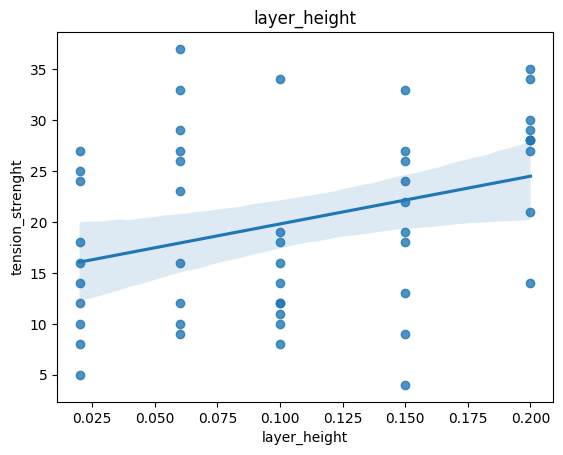

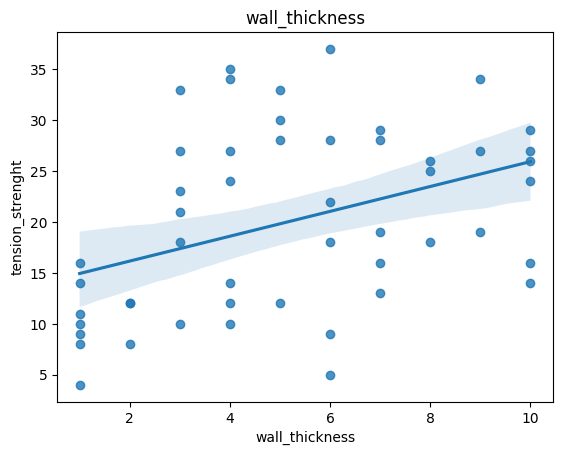

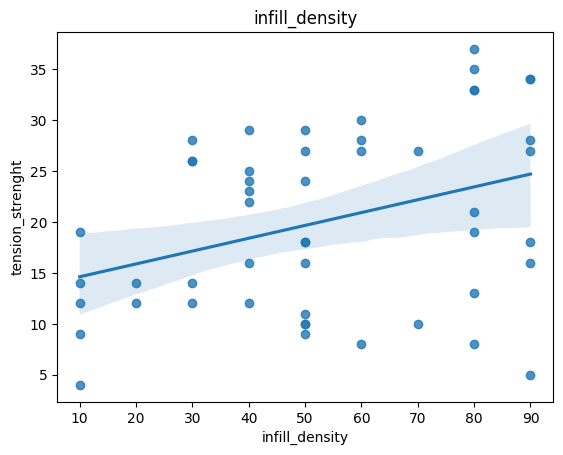

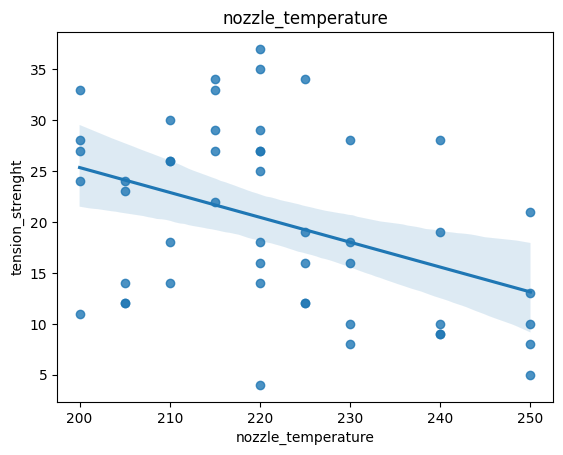

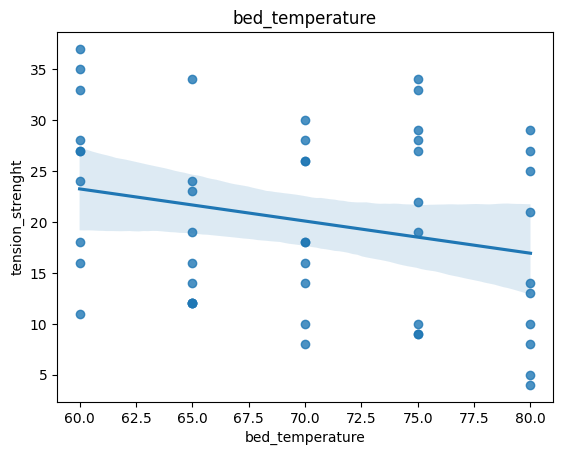

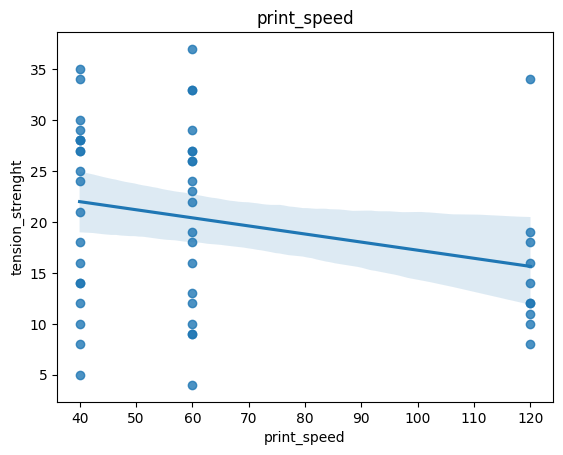

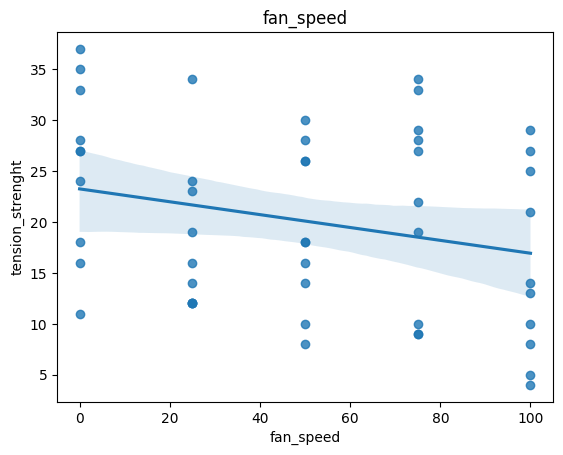

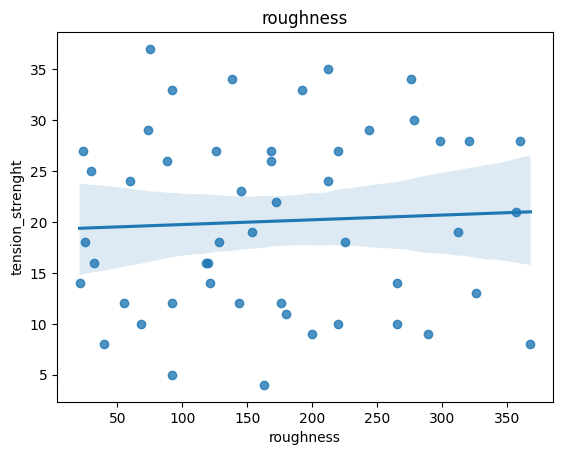

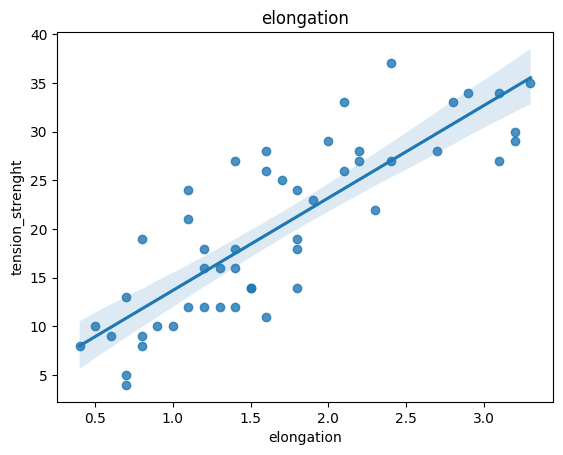

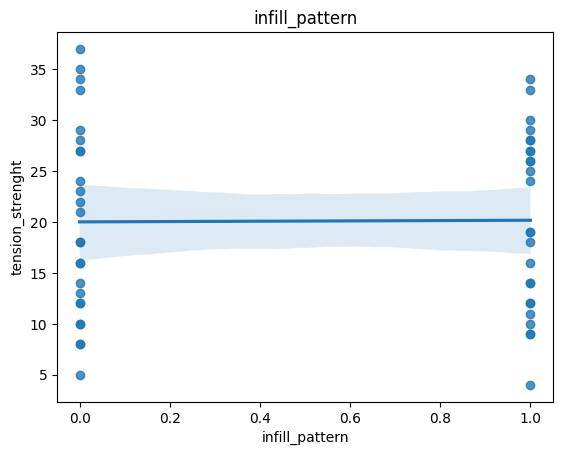

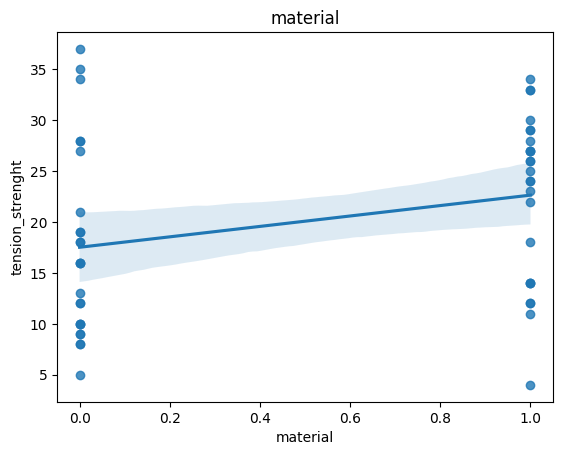

In [ ]:
import seaborn as sns

# Extract independent variable column names
x_cols = list(data2.columns)
x_cols.remove('tension_strenght')

# Create regression plot for each independent variable
for col in x_cols:
    sns.regplot(x=col, y='tension_strenght', data=data2)
    plt.title(col)
    plt.show()